<a href="https://colab.research.google.com/github/MlondiMq/Assignment-4/blob/main/Assignment_4_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Analysis 

<img src="https://img.freepik.com/free-vector/gradient-stock-market-concept_23-2149166910.jpg" width = 800px>

# Introduction

Success in any financial market requires one to identify solid investments. When a stock or derivative is undervalued, it makes sense to buy. If it's overvalued, perhaps it's time to sell. While these finance decisions were historically made manually by professionals, technology has ushered in new opportunities for retail investors. Data scientists, specifically, may be interested to explore quantitative trading, where decisions are executed programmatically based on predictions from analysis and trained models.

Stocks can be a valuable part of your investment portfolio. Owning stocks in different companies can help you build your savings, protect your money from inflation and taxes, and maximize income from your investments. It's important to know that there are risks when investing in the stock market.

Historically, long-term equity returns have been better than returns from cash or fixed-income investments such as bonds. However, stock prices tend to rise and fall over time. Investors may want to consider a long-term perspective for their equity portfolio because these stock-market fluctuations do tend to smooth out over longer periods of time.

Taxes and inflation can impact your wealth. Equity investments can give investors better tax treatment over the long term, which can help slow or prevent the negative effects of both taxes and inflation.
Some companies pay shareholders dividends or special distributions. These payments can provide you with regular investment income and enhance your return.

### S&P 500 - Microsoft

As one of the most diversified companies, Microsoft (MSFT -0.65%) has strong positions in operating systems, video games, cloud computing, productivity software, and even social media with LinkedIn. This year, the company will also expand its digital advertising business through a partnership with Netflix. 

Microsoft's varied revenue streams proved their strength in 2022, with segments less affected by economic challenges able to maintain earnings growth despite declines in specific markets. The company's stock is down 22% year over year. However, its growth of 157% over the last five years proves it is a reliable long-term investment.

In mid-January, news broke that Microsoft is considering investing 10USD billion in OpenAI, an artificial intelligence (AI) company best known for its AI chatbot ChatGPT. The deal would expand Microsoft's stake in the company after it initially invested 1USD billion in 2019. Microsoft has a share in the company and now ChatGPT has a paid for service to access the Chatbot. This will increase it's revenue. 

### S&P 500 - Amazon

Brand Finance recognized Amazon as the most valuable brand in the world in 2023. That distinction highlights the tremendous popularity its marketplace enjoys among consumers. Indeed, Amazon draws more visitors each month than any other digital shopping destination, and it accounted for 38% of online retail sales in North America and Western Europe last year. Its Prime membership program creates even more value for consumers, and its massive logistics network adds value for merchants, accelerating the network effects inherent to its business model.

Looking ahead, Ameco Research estimates that global e-commerce sales will grow at 13.6% annually to reach 15USD trillion by 2030. Amazon is exceptionally well positioned to benefit from that trend.

Amazon Web Services (AWS) was the first hyperscale public cloud, and it still dominates the market for cloud infrastructure and platform services (CIPS). AWS accounted for 32% of CIPS spending in the fourth quarter last year, putting it nine percentage points ahead of the runner-up Microsoft Azure.

### Cryptocurrency - Bitcoin

The blockchain technology underlying bitcoin and other cryptocurrencies has been hailed as a potential gamechanger for a large number of industries, from shipping and supply chains to banking and healthcare. By removing intermediaries and trusted actors from computer networks, distributed ledgers can facilitate new types of economic activity that were not possible before.

This potential makes for an attractive investment to people who believe in the future of digital currencies. For people who believe in that promise, investing in cryptocurrency represents a way to earn high returns while supporting the future of technology.

Another common reason to invest in cryptocurrency is the desire for a reliable, long-term store of value. Unlike fiat money, most cryptocurrencies have a limited supply, capped by mathematical algorithms.This makes it impossible for any political body or government agency to dilute their value through inflation. Moreover, due to the cryptographic nature of cryptocurrencies, it is impossible for a government body to tax or confiscate tokens without the cooperation of the owner.

Bitcoin has grabbed the attention of the world over the last decade, as it could represent a new form of decentralized money. The ability to have a trustless payment system without a third party intermediary has many people betting on its future being bright.Bitcoin is the fastest growing crypto currency in the world. This makes Bitcoin an important cryptocurrency and a good investment option for you to make for the market.


### Inflation

Inflation occurs when the supply of money increases relative to the level of productive output in the economy. Prices tend to rise because more dollars are chasing relatively fewer goods. Another way of stating this phenomenon is that the purchasing power of each money unit declines.

This means that inflation can have a huge impact on the way we save and invest our money: it can either reduce the value of your investment portfolio over time, or you could possibly use it to your advantage to help your investments grow.


# **IMPORTING PACKAGES**

In [1]:
# packages to install before running notebook
!pip install -q yfinance
!pip install pandas-datareader
!pip install yahoo-finance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 3.5 MB/s eta 0:00:00
  Created wheel for yahoo-finance: filename=yahoo_finance-1.4.0-py3-none-any.whl size=7216 sha256=263ccb690990a393f0c0c51a8e619496640680553e88d46f204787b0ad3248fd
  Stored in directory: /root/.cache/pip/wheels/f6/a9/34/f1aaa343d0861148f79a9df08f380e4dbbdbe27b7ba1e0e84c
Successfully built yahoo-finance


In [2]:
# for data access and mannipulation
import requests
import pandas as pd
import numpy as np

# visualizations
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

#sns.set_style('whitegrid')
#plt.style.use("fivethirtyeight")
#%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from yahoo_finance import Share
from yahoo_finance import Currency
from pandas_datareader import data as pdr
yf.pdr_override()

# For time stamps
from datetime import datetime

#ignoring warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# LOADING DATA

- Data is extracted from different sources. Yahoo Finance is a rich resource of financial market data and tools to find compelling investments.We use Yahoo Finance API for Microsoft and Amazon Data, and Alpha Vantage API for bitcoin data and inflation data.

Data is saved as csv files.

### MICROSOFT AND AMAZON DATA

- We start from 2003 before the pandemic to see how the market was performing and how the pandemic shaped that moving forward. This will help in decision making to see how sensitive these are/were to the pandemic. Both Data sets have equal number of rows because we chose the same time frame.

In [3]:
# we specify our start and end date
end = datetime.now()
start = datetime(2003, 1, 1)

In [4]:
#Amazon data
amazon_df = yf.download('AMZN', start, end)
amazon_df = amazon_df.reset_index(drop = False)
amazon_df['company_name'] = ['AMAZON' for i in range(len(amazon_df))]

#Microsoft data
msft_df = yf.download('MSFT', start, end)
msft_df = msft_df.reset_index(drop = False)
msft_df['company_name'] = ['MSFT' for i in range(len(msft_df))]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
#How the data looks
msft_df.head()

Date       Open       High        Low      Close  Adj Close    Volume  \
0 2003-01-02  26.150000  26.875000  25.855000  26.860001  16.757908  67025200   
1 2003-01-03  26.795000  26.900000  26.440001  26.895000  16.779747  55546800   
2 2003-01-06  27.010000  27.615000  26.900000  27.385000  17.085455  59456200   
3 2003-01-07  27.459999  28.004999  27.340000  27.900000  17.406765  80517400   
4 2003-01-08  27.684999  27.775000  27.055000  27.120001  16.920122  64566000   

  company_name  
0         MSFT  
1         MSFT  
2         MSFT  
3         MSFT  
4         MSFT

- Both Datasets are in USD so we need to convert to our ZAR currency. We assume the current conversion rate, **1USD = 18,71ZAR**

In [6]:
#Microsoft
msft_df['Open'] = msft_df['Open']*18.71
msft_df['High'] = msft_df['High']*18.71
msft_df['Low'] = msft_df['Low']*18.71
msft_df['Close'] = msft_df['Close']*18.71
msft_df['Adj Close'] = msft_df['Adj Close']*18.71

# first few rows
msft_df.head()

Date        Open        High         Low       Close   Adj Close  \
0 2003-01-02  489.266493  502.831250  483.747041  502.550611  313.540456   
1 2003-01-03  501.334451  503.298993  494.692410  503.205459  313.949067   
2 2003-01-06  505.357104  516.676646  503.298993  512.373354  319.668862   
3 2003-01-07  513.776583  523.973534  511.531403  522.008993  325.680573   
4 2003-01-08  517.986340  519.670243  506.199056  507.415216  316.575485   

     Volume company_name  
0  67025200         MSFT  
1  55546800         MSFT  
2  59456200         MSFT  
3  80517400         MSFT  
4  64566000         MSFT

In [7]:
#Amazon
amazon_df['Open'] = amazon_df['Open']*18.71
amazon_df['High'] = amazon_df['High']*18.71
amazon_df['Low'] = amazon_df['Low']*18.71
amazon_df['Close'] = amazon_df['Close']*18.71
amazon_df['Adj Close'] = amazon_df['Adj Close']*18.71

# first few rows
amazon_df.head()

Date       Open       High        Low      Close  Adj Close  \
0 2003-01-02  17.952245  18.410641  17.353525  18.307735  18.307735   
1 2003-01-03  18.326445  19.205815  18.158055  19.196460  19.196460   
2 2003-01-06  19.084200  19.804536  18.990650  19.364849  19.364849   
3 2003-01-07  19.486464  20.347125  19.271299  20.160025  20.160025   
4 2003-01-08  20.057120  20.206801  19.477110  19.664210  19.664210   

      Volume company_name  
0  129680000       AMAZON  
1  175140000       AMAZON  
2  153962000       AMAZON  
3  191364000       AMAZON  
4  139630000       AMAZON

### BITCOIN

In [10]:
# csv downloaded using using api key

bitcoin_df = pd.read_csv('https://raw.githubusercontent.com/MlondiMq/Assignment-4/main/currency_monthly_BTC_ZAR.csv')

In [ ]:
# first 5 rows of df
bitcoin_df.head()

timestamp     open (ZAR)     high (ZAR)      low (ZAR)    close (ZAR)   
0  2023-05-10  545462.863464  556411.976400  508682.203240  515165.466329  \
1  2023-04-30  531135.721547  578429.620000  502726.617236  545463.050054   
2  2023-03-31  431799.017461  544557.527814  364766.861292  531135.721547   
3  2023-02-28  431492.263173  471140.255000  398390.042151  431799.017461   
4  2023-01-31  308653.217265  447080.195071  307855.357570  431492.263173   

   open (USD)  high (USD)  low (USD)  close (USD)        volume   
0    29233.20    29820.00   27262.00     27609.46  4.765123e+05  \
1    28465.36    31000.00   26942.82     29233.21  1.626746e+06   
2    23141.57    29184.68   19549.09     28465.36  9.516189e+06   
3    23125.13    25250.00   21351.07     23141.57  8.642691e+06   
4    16541.77    23960.54   16499.01     23125.13  7.977029e+06   

   market cap (USD)  
0      4.765123e+05  
1      1.626746e+06  
2      9.516189e+06  
3      8.642691e+06  
4      7.977029e+06

- We will focus on the ZAR currency.

In [ ]:
# taking columns with ZAR
ZAR = [i for i in bitcoin_df.columns if 'ZAR' in i]
cols = ['timestamp'] + ZAR + ['volume']

bitcoin_df = bitcoin_df[cols]
bitcoin_df.head()

timestamp     open (ZAR)     high (ZAR)      low (ZAR)    close (ZAR)   
0  2023-05-10  545462.863464  556411.976400  508682.203240  515165.466329  \
1  2023-04-30  531135.721547  578429.620000  502726.617236  545463.050054   
2  2023-03-31  431799.017461  544557.527814  364766.861292  531135.721547   
3  2023-02-28  431492.263173  471140.255000  398390.042151  431799.017461   
4  2023-01-31  308653.217265  447080.195071  307855.357570  431492.263173   

         volume  
0  4.765123e+05  
1  1.626746e+06  
2  9.516189e+06  
3  8.642691e+06  
4  7.977029e+06

- Our data now comforms to our currency.

### INFLATION

In [11]:
# inflation csv downloaded using using api key

inflation_df = pd.read_csv('https://raw.githubusercontent.com/MlondiMq/Assignment-4/main/INFLATION.csv')
inflation_df = inflation_df.reset_index(drop = True)
inflation_df = inflation_df.sort_values(by = 'timestamp')

In [ ]:
# first few rows
inflation_df.head()

timestamp     open (ZAR)     high (ZAR)      low (ZAR)    close (ZAR)   
32  2020-09-30  217368.440080  224857.051167  183324.871500  201080.608342  \
31  2020-10-31  201080.608342  263092.182000  193568.673480  257326.544820   
30  2020-11-30  257326.544820  370627.099703  246206.701851  367505.632247   
29  2020-12-31  367505.632247  546709.286000  327882.456917  539686.590643   
28  2021-01-31  539686.590643  782745.889000  524878.232600  617482.575680   

    open (USD)  high (USD)  low (USD)  close (USD)        volume   
32    11649.51    12050.85    9825.00     10776.59  1.730389e+06  \
31    10776.59    14100.00   10374.00     13791.00  1.592634e+06   
30    13791.00    19863.16   13195.05     19695.87  2.707065e+06   
29    19695.87    29300.00   17572.33     28923.63  2.495282e+06   
28    28923.63    41950.00   28130.00     33092.98  3.440865e+06   

    market cap (USD)  
32      1.730389e+06  
31      1.592634e+06  
30      2.707065e+06  
29      2.495282e+06  
28      3.440865e+06

# Descriptive Statistics about the Data
- Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding `NaN` values. This should provide high level statistics about our data.


In [ ]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1096 non-null   datetime64[ns]
 1   Open          1096 non-null   float64       
 2   High          1096 non-null   float64       
 3   Low           1096 non-null   float64       
 4   Close         1096 non-null   float64       
 5   Adj Close     1096 non-null   float64       
 6   Volume        1096 non-null   int64         
 7   company_name  1096 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 68.6+ KB


- Reviewing the content of our data, we can see that the data is numeric(except for the date and company name), aggregated daily and the date is the index of the data. Notice also that weekends and holiday are missing from the records.

In [ ]:
amazon_df.describe()

Date         Open         High          Low   
count                           1096  1096.000000  1096.000000  1096.000000  \
mean   2021-03-05 05:14:00.875912448  2372.472863  2401.743551  2340.927472   
min              2019-01-02 00:00:00  1370.694640  1438.799029  1366.700037   
25%              2020-02-03 18:00:00  1759.160994  1779.625020  1739.431252   
50%              2021-03-06 12:00:00  2253.076865  2283.677105  2217.654167   
75%              2022-04-05 06:00:00  2996.609870  3026.541274  2959.697546   
max              2023-05-09 00:00:00  3502.511943  3529.716470  3458.346910   
std                              NaN   621.671064   627.556301   613.808196   

             Close    Adj Close        Volume  
count  1096.000000  1096.000000  1.096000e+03  
mean   2371.615044  2371.615044  7.891115e+07  
min    1403.511939  1403.511939  1.762600e+07  
25%    1761.312604  1761.312604  5.623618e+07  
50%    2254.840349  2254.840349  6.916835e+07  
75%    2993.885349  2993.885349  9.269400e+07  
max    3490.733973  3490.733973  3.113460e+08  
std     619.667409   619.667409  3.408719e+07

- 50% of the share price is above average share price. This implies good returns on investments.

In [ ]:
msft_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1096 non-null   datetime64[ns]
 1   Open          1096 non-null   float64       
 2   High          1096 non-null   float64       
 3   Low           1096 non-null   float64       
 4   Close         1096 non-null   float64       
 5   Adj Close     1096 non-null   float64       
 6   Volume        1096 non-null   int64         
 7   company_name  1096 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 68.6+ KB


In [ ]:
msft_df.describe()

Date         Open         High          Low   
count                           1096  1096.000000  1096.000000  1096.000000  \
mean   2021-03-05 05:14:00.875912448  4132.436559  4176.585843  4087.139576   
min              2019-01-02 00:00:00  1862.580557  1874.554946  1818.611943   
25%              2020-02-03 18:00:00  2974.422293  3011.795472  2944.579749   
50%              2021-03-06 12:00:00  4342.965251  4402.182276  4299.557914   
75%              2022-04-05 06:00:00  5102.357548  5168.544144  5043.093274   
max              2023-05-09 00:00:00  6447.840109  6542.325951  6402.562228   
std                              NaN  1203.652485  1215.566371  1189.930433   

             Close    Adj Close        Volume  
count  1096.000000  1096.000000  1.096000e+03  
mean   4134.181913  4065.791985  2.997977e+07  
min    1822.354029  1741.484724  8.989200e+06  
25%    2990.325693  2900.939307  2.227682e+07  
50%    4341.562058  4270.944342  2.701435e+07  
75%    5095.154158  5075.156304  3.392862e+07  
max    6419.587826  6344.103756  9.701270e+07  
std    1203.267815  1217.755071  1.257568e+07

- 50% of the share price is above average share price. This implies good returns on investments.

In [ ]:
#bitcoin
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    33 non-null     object 
 1   open (ZAR)   33 non-null     float64
 2   high (ZAR)   33 non-null     float64
 3   low (ZAR)    33 non-null     float64
 4   close (ZAR)  33 non-null     float64
 5   volume       33 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.7+ KB


- Monthly data is for the last two years.

In [ ]:
#bitcoin_df
bitcoin_df.describe()

open (ZAR)    high (ZAR)      low (ZAR)   close (ZAR)        volume
count  3.300000e+01  3.300000e+01      33.000000  3.300000e+01  3.300000e+01
mean   6.141030e+05  7.228194e+05  515145.382439  6.231277e+05  3.507212e+06
std    2.705471e+05  3.117289e+05  212936.819928  2.617249e+05  2.818500e+06
min    2.010806e+05  2.248571e+05  183324.871500  2.010806e+05  4.765123e+05
25%    3.740842e+05  4.602807e+05  338213.023340  3.823371e+05  1.565556e+06
50%    5.933764e+05  7.468043e+05  508682.203240  5.933762e+05  2.387840e+06
75%    8.176384e+05  9.422805e+05  693275.888100  8.177148e+05  4.983279e+06
max    1.143794e+06  1.287472e+06  993716.710893  1.143794e+06  9.838931e+06

- 50% of the share price is above average share price on different attributes but below or equal on some attributes i.e Open, Close, high, low. This implies good returns on investments or not so good. This requires a deep dive to the time series trend.

In [ ]:
#inflation_df
inflation_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, 62 to 0
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  63 non-null     object 
 1   value      63 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.5+ KB


- Data has 63 rows, it's a yearly value from 1960 to the current date. timestamp is the date and value is the inflation.

In [ ]:
#inflation_df
inflation_df.describe()

value
count  63.000000
mean    3.764840
std     2.784628
min    -0.355546
25%     1.855129
50%     3.015075
75%     4.499197
max    13.549202

- 75% of data is less than 5%, even though the maximum is 13.6%, the inflation rate has not increased drastically for many years. We are seeing a drastic change though recently.

# EXPLORATORY DATA ANALYSIS (EDA)

This include methods like:

- Maximize our natural pattern-recognition abilities to extract insights.
- Uncover underlying structure (e.g skewness).
- Extract important variables and find interesting relations among the variables.
- Detect Anomalies.


## Closing Price

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark for investors to track it's performance over time.

In [ ]:
# combining msft_df and amazon_df
df = pd.concat([msft_df,amazon_df])

In [ ]:
# amazon and microst
fig = px.line(df, x="Date", y="Adj Close", title='Microsoft and Amazon Share Closing Price since 2019', color = 'company_name')
fig.show()

- We can see that the average price of microsoft stock has been on an up trend from 2019 till 2021 Dec then it decreased a little bit but not move than the average increase it had previously but from this we can expect it to continue increasing given the investments microsoft is currently making.


- we can see that the average price of amazon stock has been increasing from 2019 Jan till 2020 end of August then from there the stock price has been fluctuating between the period 2020 Sep till 2022 April, I personally think is due to the Coronavirus lockdown which made a lot of people to do most of their shopping online since it was more convinient then the stock reached a plateau since not everyone was doing online shopping and then as soon as the lockdown restrictions were eased then we can see a drop in the stock for amazon. and hence we see a drop from 2022 April  till present but we will see stabilizing then as soon as most people get used to technology then we will see an increase on the stock price for amazon.

In [ ]:
#bitcoin
fig = px.line(bitcoin_df, x="timestamp", y="close (ZAR)", title='Bitcoin Closing Share price for the last 2 years')
fig.show()

- we can see that bitcoin has been increasing until 2021 since Russia has been preparing to go to war with Ukraine then Russia started a war on the 24 of February in 2022 that is when USA started making sanctions towards Russia which also started making sanctions which affected the world energy and most of all it increased the inflaction of productions since all products are being transported by most of the energy which comes from Russia hence we saw a decline in the demand of crypto since it was too expensive for people to buy and given the high inflation made it difficult for people to afford crypto hence there was a drop in the value of crypto since less people were investing in crypto.    

## Volume of Sales
- Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for forecasting.

In [ ]:
# amazon and microst
fig = px.line(df, x="Date", y="Volume", title='Microsoft and Amazon Volume since 2019', color = 'company_name')
fig.show()

- The volume for sales of amazon is higher than for microsoft because amazon has been providing their services online which showed that most people trusted it with online transactions compared to microsoft which was not that popular online as compared to amazon.


- Another thing that has sparked increase is the pandemic which forced a lot of companies were working online during lockdown which resulted with amazon having more clients in cloud computing due to it's aws services being affordable and the discounts they offering based on the packages you have with them.


In [ ]:
#bitcoin
fig = px.line(bitcoin_df, x="timestamp", y="volume", title='Bitcoin volume for the last 2 years')
fig.show()

- Since the demand for bitcoin was low most people thought it was the right time to buy bitcoin since it was cheap so they hoped that it might gain strength and also appreciate again but since the ongoing war made it lose more value hence you saw a lot of people dropping their investments from it since it was too risky to invest in.

# Let's look at the moving average of the various stocks

- The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

In [ ]:
# 30 days
ma = 30
df['moving_avg'] = df['Adj Close'].rolling(ma).mean()

In [ ]:
# amazon and microst
fig = px.line(df, x="Date", y="moving_avg", title='Microsoft and Amazon {} days Moving average'.format(ma), color = 'company_name')
fig.show()

- we can see that the moving average for microsoft is showing an uptrend so it most likely to maintain that trend given their investments and their products which shows dominancy in the computer space and their expansion in the technological space. 

In [ ]:
# 10 days
ma = 10
bitcoin_df['moving_avg'] = bitcoin_df['close (ZAR)'].rolling(ma).mean()

In [ ]:
# bitcoin
fig = px.line(bitcoin_df, x="timestamp", y="moving_avg", title='bitcoin {} days Moving average'.format(ma))
fig.show()

- we used a rolling sum of 10 days due to not having enough data and using a rolling sum of higher days can be misleading but we can see that the moving average is going down since 2021 as we mentioned that bitcoin has lost value in the past 2 years.

# Daily return of the stock on average

- We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value.

In [ ]:
# amazon and microsoft

df['Daily Return'] = df['Adj Close'].pct_change()

In [ ]:
fig = px.line(df, x="Date", y="Daily Return", title='Microsoft and Amazon Daily Return since 2019', color = 'company_name')
fig.show()

- For both companies we can see that the returns are very little due to the fact that we are only considering long term returns instead of a daily return but these return in the long run they accumulate to a large amount.

In [ ]:
# Bitcoin
bitcoin_df['Daily Return'] = bitcoin_df['close (ZAR)'].pct_change()

In [ ]:
fig = px.line(bitcoin_df, x="timestamp", y="Daily Return", title='Bitcoin Daily Return')
fig.show()

- Even though we can see that daily returns for bitcoin are unstable since they can be losses at times ever since so i would not advise anyone to invest in it given with the war going on at the moment.

# Correlation and Regression on stocks

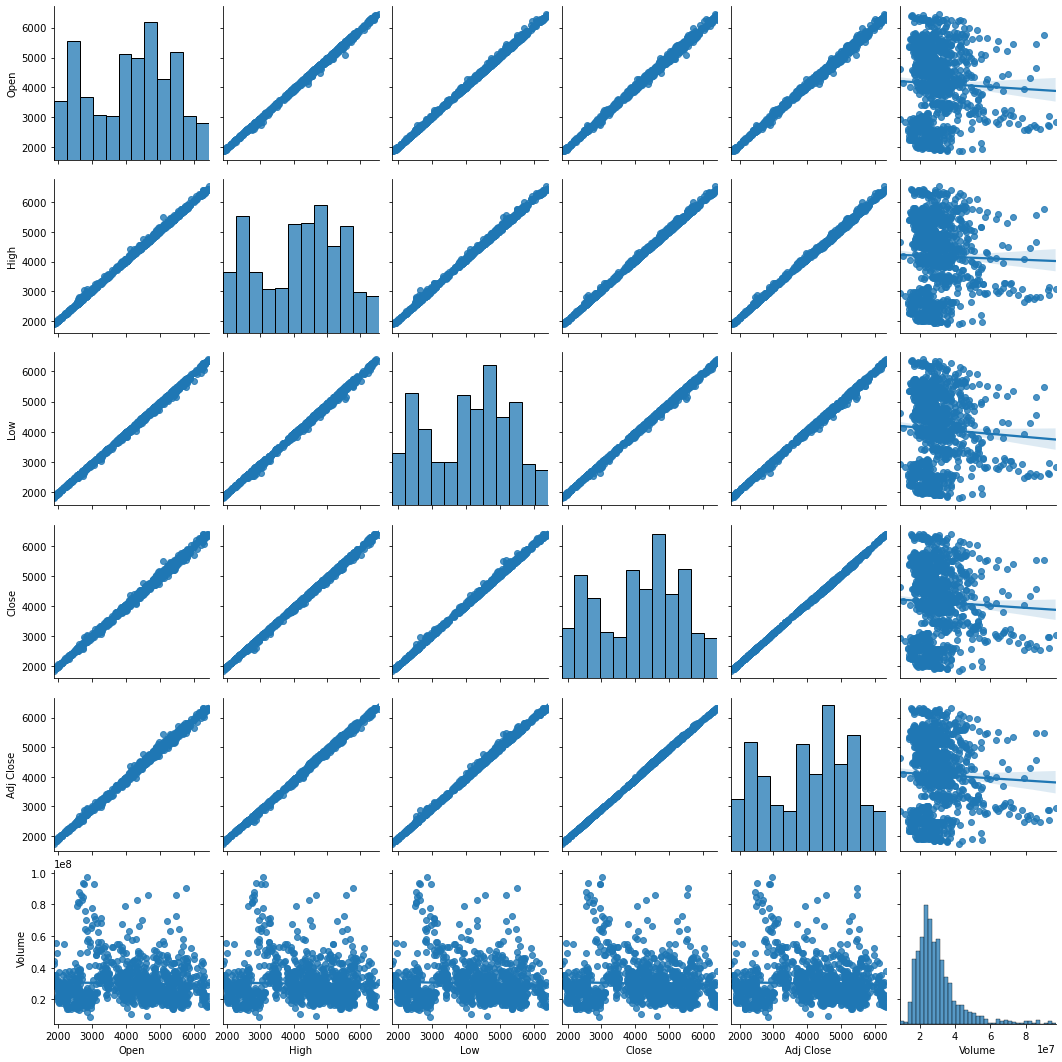

In [ ]:
# microsoft

sns.pairplot(msft_df, kind='reg')

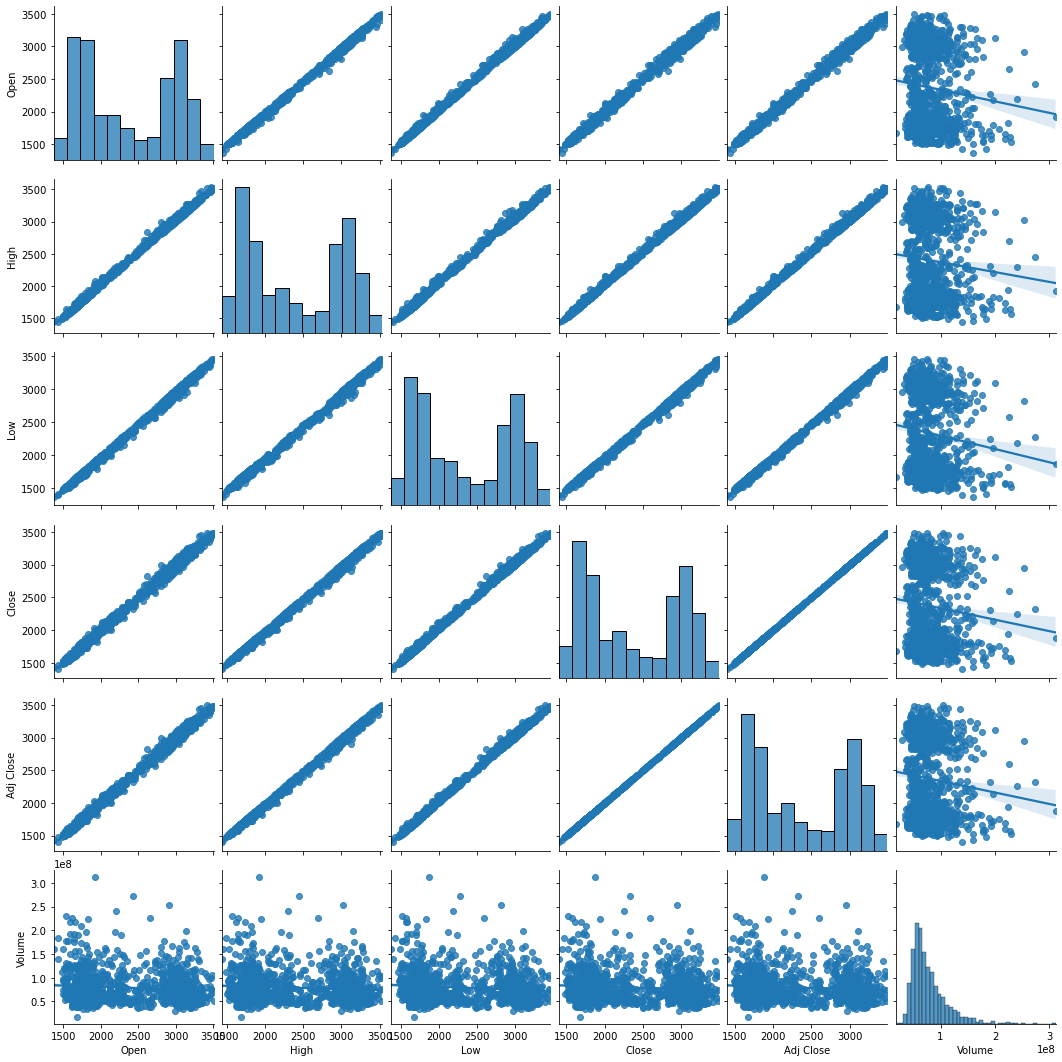

In [ ]:
# amazon
sns.pairplot(amazon_df, kind='reg')

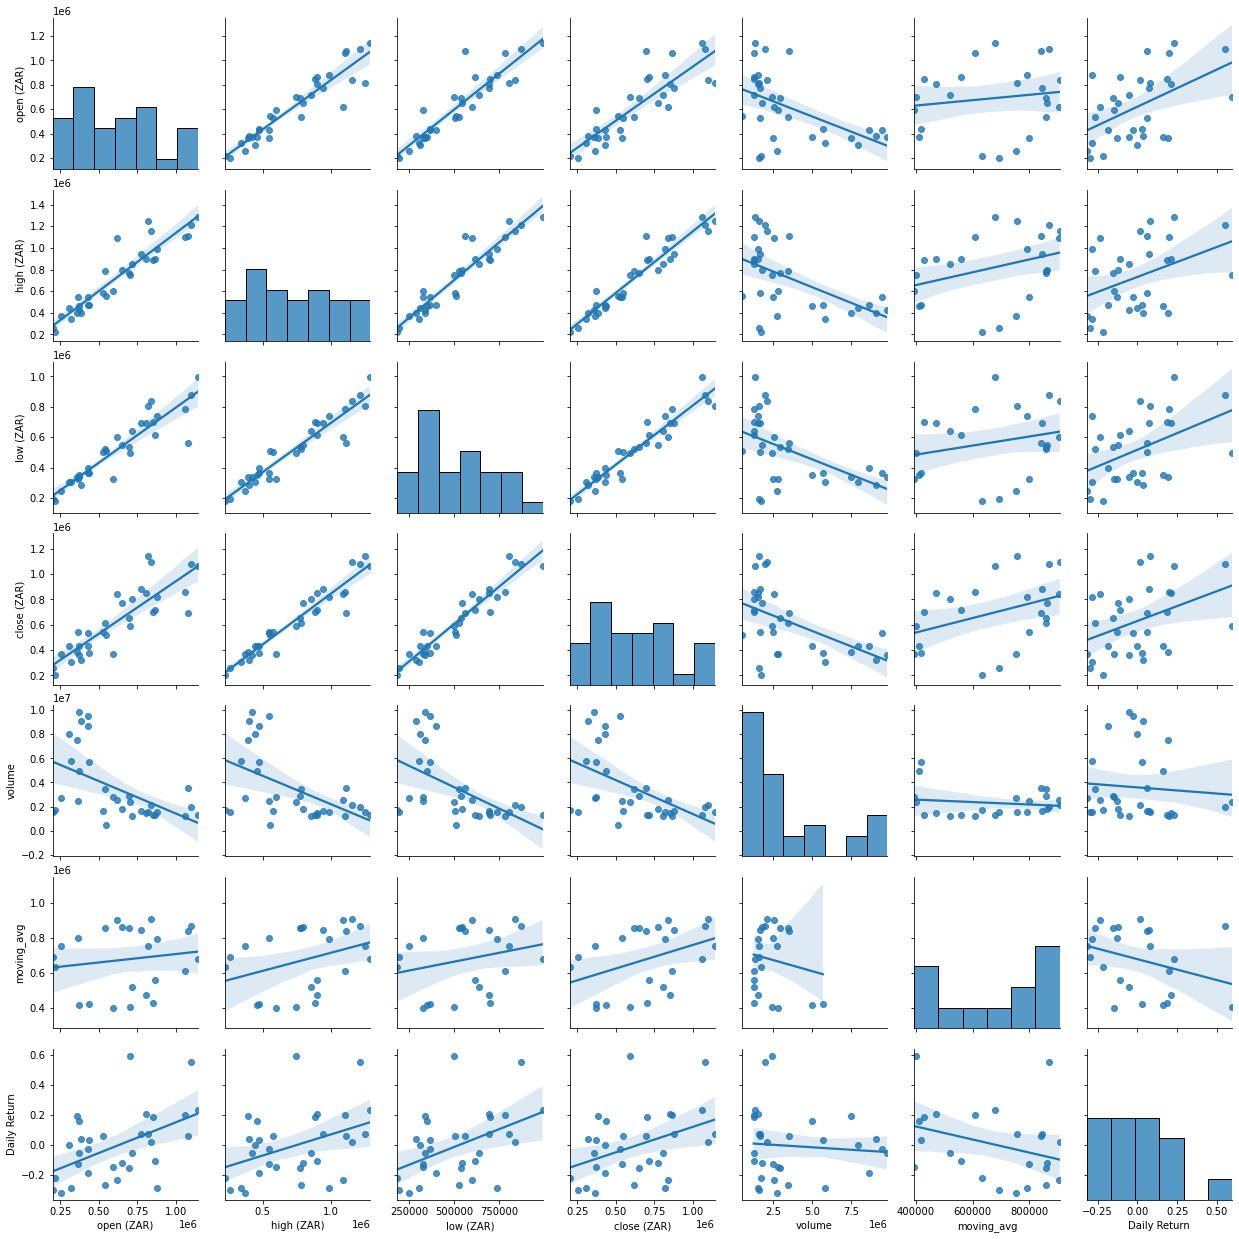

In [ ]:

# Bitcoin regression pair plot
sns.pairplot(bitcoin_df, kind='reg')

# Risk by investing in a particular stock

Text(0, 0.5, 'Risk')

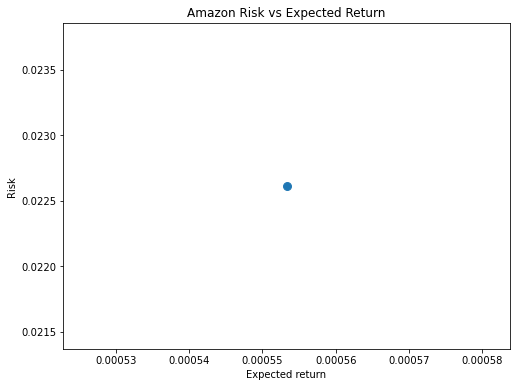

In [ ]:
# Amazon

rets = amazon_df['Adj Close'].pct_change()

area = np.pi * 20
plt.figure(figsize=(8, 6))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.title('Amazon Risk vs Expected Return')
plt.xlabel('Expected return')
plt.ylabel('Risk')
plt.savefig('amazon_return.png')

- The expected return is way small to the risk we are exposing our investment so i would say the investment is not worth it

Text(0, 0.5, 'Risk')

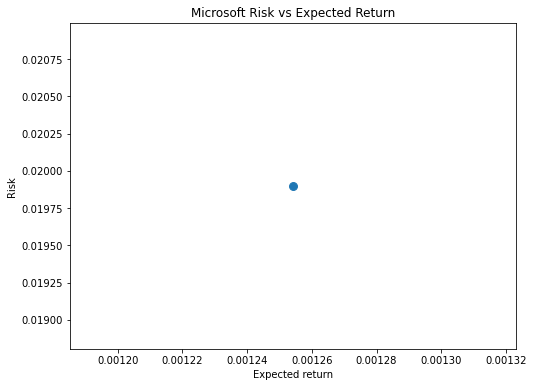

In [ ]:
# Microsoft

rets = msft_df['Adj Close'].pct_change()

area = np.pi * 20

plt.figure(figsize=(8, 6))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.title('Microsoft Risk vs Expected Return')
plt.xlabel('Expected return')
plt.ylabel('Risk')
plt.savefig('microsoft_return.png')

- comparing this to risk to return ratio for amazon we can see that we have almost the same risk but a higher return to that of amazon so if i were to invest i would invest in the microsoft stock as it has higher returns compared to amazon stocks

In [ ]:
# Bitcoin
bitcoin_df['Daily Return'] = bitcoin_df['close (ZAR)'].pct_change()


In [ ]:
tech_rets = bitcoin_df['close (ZAR)'].pct_change()


Text(0, 0.5, 'Risk')

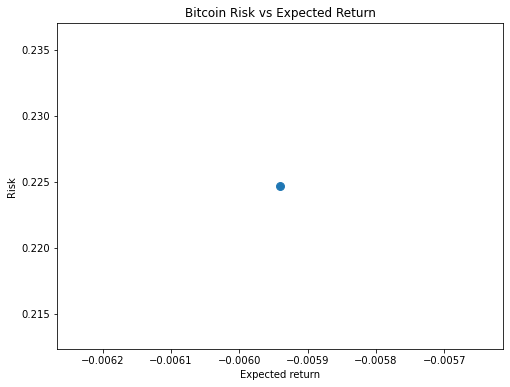

In [ ]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(8, 6))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.title('Bitcoin Risk vs Expected Return')
plt.xlabel('Expected return')
plt.ylabel('Risk')
plt.savefig('bitcoin_return.png')

- Bitcoin has the highest risk as to the other stocks and the returns are a loss so it would not be wise to invest to it due to the votility of the stock and it not yielding enough returns for a profit.

In [ ]:
inflation_df['year'] = inflation_df['timestamp'].str[:4]

In [ ]:
inflation_df = inflation_df[inflation_df['year'] >= '1995']

In [ ]:
#Inflation
fig = px.line(inflation_df, x="timestamp", y="value", title='Inflation from year 1995')
fig.show()

- Given the increase in the inflation since the pandemic it is advisable to invest in microsoft since they have a stable stock and they are on a increasing trend and the return to risk ratio is high hence it is better to put the investment on microsoft than any stock we have talked about. 